In [278]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime
import random
import scipy.optimize as optimization
from typing import Optional

In [279]:
NUM_TRADING_DAYS = 252 # Number of trading days in a year
NUM_PORTFOLIOS = 1000 # Number of portfolios we want to make
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']

In [280]:
def get_all_symbols():
    """Gets all the symbols for the S&P 500"""
    df = pd.read_csv('sp500_companies.csv')
    symbols = [symbol for symbol in df['Symbol']]
    return symbols

In [281]:
# Acquire Market Data
# Load historical market data into a pandas DataFrame
def load_market_data(symbol, start_date, end_date):
    """Loads data for a single stock"""
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

In [282]:
# Create a ramdom portfolio
def create_random_portfolio(number): #TODO: Add functionality such that you can use different exchanges
    """Creates a random portfolio"""
    symbols = get_all_symbols()
    stocks = []
    for i in range(number):
        stock = random.choice(symbols)
        symbols.remove(stock)
        stocks.append(stock)
    return stocks

In [283]:
# Allows you to get data for multiple tickers
def download_data_random_portfolio(number, start_date, end_date):
    # name of the stock (key) - stock values (2010-date) as the values
    stock_data = {}
    stocks = create_random_portfolio(number)
    for stock in stocks:
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close']
    return pd.DataFrame(stock_data)

In [284]:
def download_data_manual(stocks, start_date, end_date):
    """Use this function if you want to manually choose the stocks you want 
    to get the data for."""
    stock_data = {}
    stocks1 = stocks
    for stock in stocks1:
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close']
    return pd.DataFrame(stock_data)

In [285]:
x = download_data_random_portfolio(5, "2020-01-01", "2024-01-01")
x

,SLB,FSLR,TXN,NWS,HD
Date,,,,,
2020-01-02 00:00:00-05:00,36.206547,57.240002,113.483543,14.039081,195.751526
2020-01-03 00:00:00-05:00,36.558071,57.020000,111.977074,14.048560,195.100967
2020-01-06 00:00:00-05:00,36.792408,55.830002,111.197571,14.001162,196.018814
2020-01-07 00:00:00-05:00,36.603134,56.669998,113.343422,14.152832,194.735580
2020-01-08 00:00:00-05:00,35.521534,56.700001,113.649956,14.190751,197.649658
...,...,...,...,...,...
2023-12-22 00:00:00-05:00,52.103951,170.389999,164.656372,24.758553,342.047699
2023-12-26 00:00:00-05:00,52.692917,171.940002,167.171631,25.115932,342.754150
2023-12-27 00:00:00-05:00,52.054871,172.440002,167.582672,25.423677,341.988831


In [286]:
def show_data(data):
    """Plots the prices of the stocks in data"""
    data.plot(figsize=(10, 5))
    plt.show()

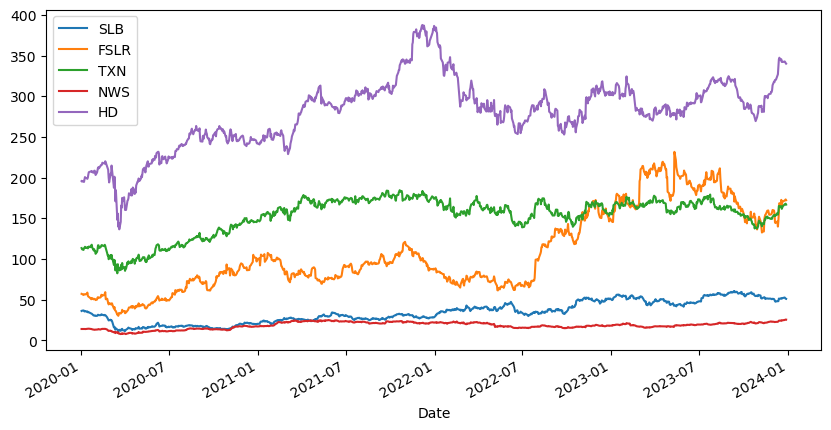

In [287]:
show_data(x)

In [288]:
def calculate_return(data):
    """Calculate the log returns of the portfolio"""
    log_return = np.log(data/data.shift(1))
    return log_return[1:]

In [289]:
calculate_return(x)

,SLB,FSLR,TXN,NWS,HD
Date,,,,,
2020-01-03 00:00:00-05:00,0.009662,-0.003851,-0.013364,0.000675,-0.003329
2020-01-06 00:00:00-05:00,0.006390,-0.021091,-0.006986,-0.003380,0.004693
2020-01-07 00:00:00-05:00,-0.005158,0.014934,0.019114,0.010774,-0.006568
2020-01-08 00:00:00-05:00,-0.029995,0.000529,0.002701,0.002676,0.014853
2020-01-09 00:00:00-05:00,0.011354,0.000000,0.012026,-0.010746,0.015214
...,...,...,...,...,...
2023-12-22 00:00:00-05:00,0.009464,0.002056,0.008536,0.005226,-0.001090
2023-12-26 00:00:00-05:00,0.011240,0.009056,0.015160,0.014331,0.002063
2023-12-27 00:00:00-05:00,-0.012183,0.002904,0.002456,0.012179,-0.002235


In [290]:
def show_statistics(returns):
    print(returns.mean() * NUM_TRADING_DAYS)
    print(returns.cov() * NUM_TRADING_DAYS)

In [291]:
def show_mean_variance(returns, weights):
    portfolio_return = np.sum(returns.mean()*weights) * NUM_TRADING_DAYS
    portfolio_volatility = np.sqrt(weights.T, np.dot(returns.cov()))

    print('Expected portfolio mean (return): ', portfolio_return)
    print('Expected portfolio volatility (standard deviation): ', portfolio_volatility)

In [292]:
def generate_portfolios_equal_weightage(returns):
    """Generates a portfolio with equal weifhtages"""
    portfolio_means = []
    portfolio_risks = []
    portfolio_weights = []

    num_stocks = len(returns.columns) # takes the number of stocks in returns. Minus 1 because of date column
    # Equal weight for each stock
    w = np.ones(num_stocks) / num_stocks
    for _ in range(NUM_PORTFOLIOS):
        portfolio_weights.append(w)
        portfolio_means.append(np.sum(returns.mean() * w) * NUM_TRADING_DAYS)
        portfolio_risks.append(np.sqrt(np.dot(w.T, np.dot(returns.cov() * NUM_TRADING_DAYS, w))))

    return np.array(portfolio_weights), np.array(portfolio_means), np.array(portfolio_risks)

In [293]:
import numpy as np

def generate_portfolios_random_weightage(returns):
    """Generates a portfolio with random weightage"""
    portfolio_means = []
    portfolio_risks = []
    portfolio_weights = []

    num_stocks = len(returns.columns)

    for _ in range(NUM_PORTFOLIOS):
        w = np.random.random(num_stocks)
        w /= np.sum(w)  # Normalize to ensure weights sum to 1
        portfolio_weights.append(w)
        portfolio_means.append(np.sum(returns.mean() * w) * NUM_TRADING_DAYS)
        portfolio_risks.append(np.sqrt(np.dot(w.T, np.dot(returns.cov() * NUM_TRADING_DAYS, w))))

    return np.array(portfolio_weights), np.array(portfolio_means), np.array(portfolio_risks)

In [294]:
def show_portfolios(returns, volatilities):
    """Visualize the generated portfolio"""
    plt.figure(figsize=(10, 6))
    plt.scatter(volatilities, returns, c=returns/volatilities, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')

In [295]:
def calculate_portfolio_return(weights, returns):
    """
    Calculate the total return of a portfolio.

    Parameters:
    weights (np.array): Array of portfolio weights.
    returns (pd.DataFrame): DataFrame of asset returns.

    Returns:
    float: Total return of the portfolio.
    """
    # Ensure weights and returns have compatible shapes
    if len(weights[0]) != returns.shape[1]:
        raise ValueError("The number of weights must match the number of assets in returns")

    # Calculate the total return
    total_return = np.sum(weights[0] * returns.mean()) * NUM_TRADING_DAYS
    return total_return

This code is for the Markowitz model.

In [296]:
def statistics(weights, returns):
    portfolio_return = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weights)))

    return np.array([portfolio_return, portfolio_volatility, portfolio_return / portfolio_volatility])

def generate_portfolios_markowitz(returns):
    portfolio_means = []
    portfolio_risks = []
    portfolio_weights = []
    for _ in range(NUM_PORTFOLIOS):
        w = np.random.random(len(stocks))
        w /= np.sum(w)
        portfolio_weights.append(w)
        portfolio_means.append(np.sum(returns.mean()*w) * NUM_TRADING_DAYS)
        portfolio_risks.append(np.sqrt(np.dot(w.T, np.dot(returns.cov() *NUM_TRADING_DAYS, w))))

    return np.array(portfolio_weights), np.array(portfolio_means), np.array(portfolio_risks)

def min_function_sharpe(weights, returns):
    return -statistics(weights, returns)[2]

def optimize_portfolio(weights, returns):
    # the sum of the weights is 1
    constraints = {'type':'eq', 'fun': lambda x: np.sum(x)-1}
    bounds = tuple((0, 1) for _ in range(len(stocks)))
    return optimization.minimize(fun=min_function_sharpe, x0=weights[0], args=returns, method='SLSQP', bounds=bounds, constraints=constraints)

def print_optimal_portfolio(optimum, returns):
    print("Optimal porfolio: ", optimum['x'].round(3))
    print("Expected return, volatility and Sharpe ratio: ",
          statistics(optimum['x'].round(3), returns))

def show_optimal_portfolio(opt, rets, portfolio_rets, portfolio_vols):
    """Visualize the optimal portfolio (Markowitz model"""
    plt.figure(figsize=(10, 6))
    plt.scatter(portfolio_vols, portfolio_rets, c=portfolio_rets/portfolio_vols, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.plot(statistics(opt['x'], rets)[1], statistics(optimum['x'], rets)[0], 'g*', markersize=20)
    plt.show()
    

Here is an example usage, for chosen stocks. 

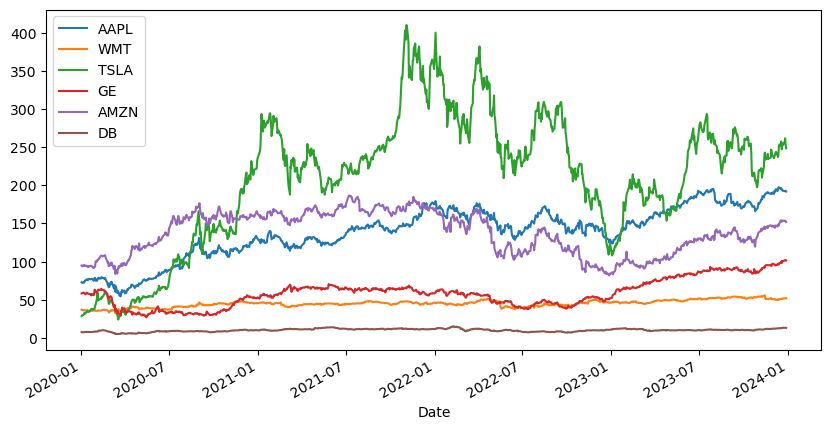

Total Portfolio Return: 0.21041317859480177


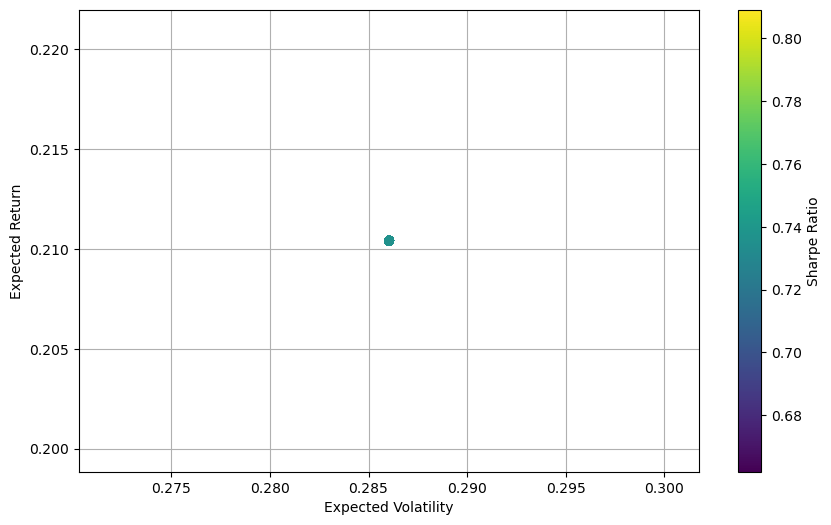

In [297]:
dataset = download_data_manual(['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB'], "2020-01-01", "2024-01-01")
show_data(dataset)
log_daily_returns = calculate_return(dataset)
#show_statistics(log_daily_returns)

pweights, means, risks =  generate_portfolios_equal_weightage(log_daily_returns)
show_portfolios(means, risks)
total_return = calculate_portfolio_return(pweights, log_daily_returns)
print("Total Portfolio Return:", total_return)

Here is an example usage, for random stocks

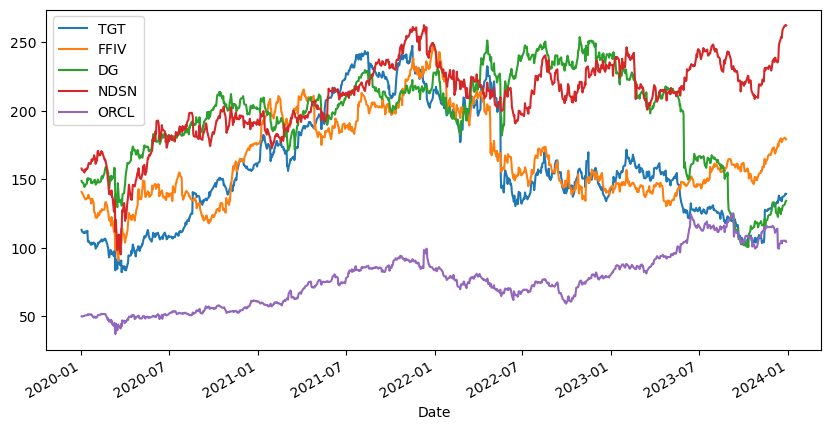

Total Portfolio Return: 0.0796583827332409


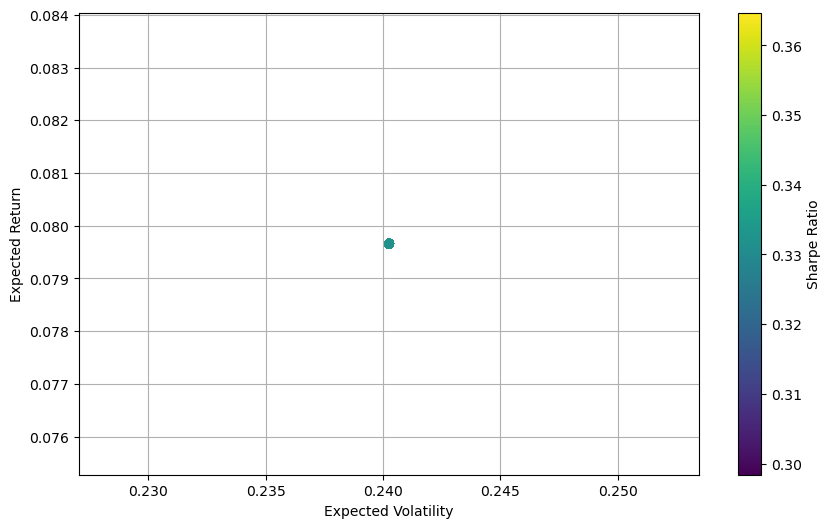

In [298]:
dataset = download_data_random_portfolio(5, "2020-01-01", "2024-01-01")
show_data(dataset)
log_daily_returns = calculate_return(dataset)
#show_statistics(log_daily_returns)

pweights, means, risks =  generate_portfolios_equal_weightage(log_daily_returns)
# can use generate_portfolios_random_weightage as well
show_portfolios(means, risks)
total_return = calculate_portfolio_return(pweights, log_daily_returns)
print("Total Portfolio Return:", total_return)

Here is an example usage, finding the optimal weights using the Markowitz model. 

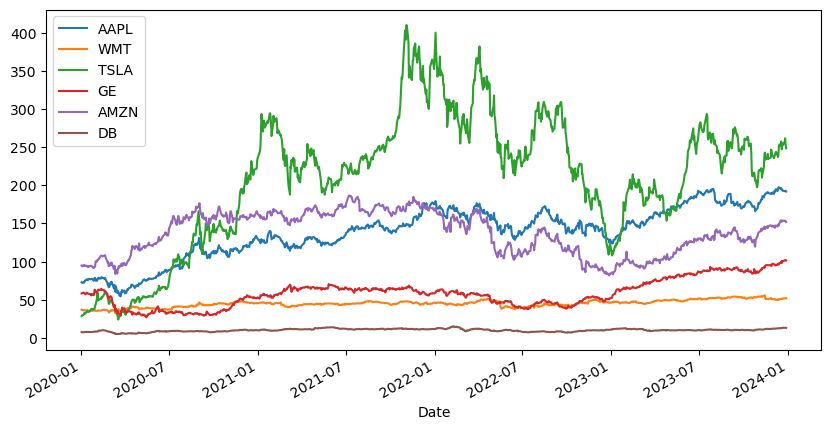

Optimal porfolio:  [0.434 0.204 0.34  0.022 0.    0.   ]
Expected return, volatility and Sharpe ratio:  [0.31006764 0.35196645 0.88095796]


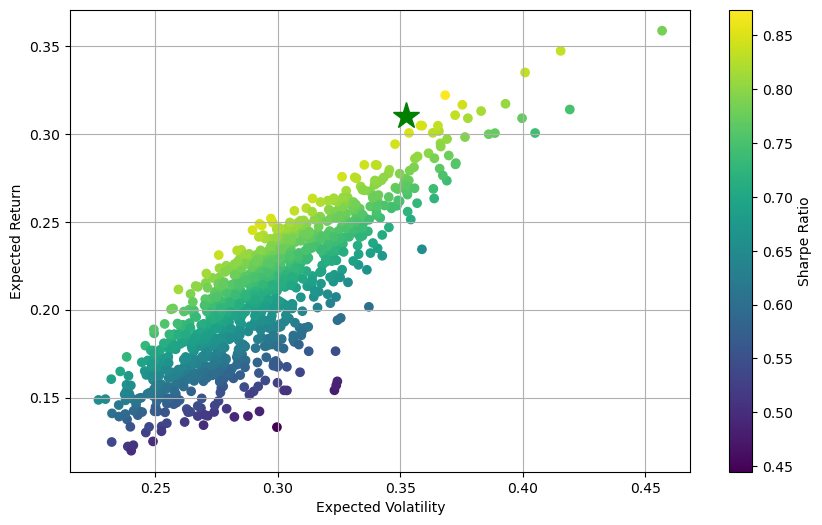

Total Portfolio Return: 0.2444056448490768


In [301]:
# Comparing it to the Markowitz model.
dataset = download_data_manual(['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB'], "2020-01-01", "2024-01-01")
show_data(dataset)
log_daily_returns = calculate_return(dataset)

pweights, means, risks = generate_portfolios_markowitz(log_daily_returns)
optimum = optimize_portfolio(pweights, log_daily_returns)
print_optimal_portfolio(optimum, log_daily_returns)
show_optimal_portfolio(optimum, log_daily_returns, means, risks)
total_return = calculate_portfolio_return(pweights, log_daily_returns)
print("Total Portfolio Return:", total_return)

In [12]:
x = 'hannah'
print(x[0:3])
print(x[3:len(x)][::-1])

han
han


In [19]:
x = 'hello'
x[0:]

'hell'

In [1]:
def check_if_palindrome(s):
    left = 0
    right = len(s) - 1

    while left < right:
        if s[left] != s[right]:
            return False
        left += 1
        right -= 1

    return True

In [6]:
def main():
    n = int(input("Enter a number\n"))
    print("The result is ", mystery(n))
    
def mystery(n):
    if n == 0:
        return 0
    return mystery(n-1) + (2*n)-1
    

In [10]:
main()

The result is  9


In [38]:
s = 'hannah'
s[0:len(s)//2]

'han'

In [39]:
s[len(s)-len(s)//2:][::-1]

'han'

In [40]:
5//2

2

In [41]:
x = 'hannah'
x[2::-1]

'nah'

In [6]:
7//2

3